<a href="https://colab.research.google.com/github/vdnghia03/Deep-Learning/blob/main/DL2_Image_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## Image Kernels
---

Read more:
- [Image kernels explained visually - setosa.io](https://setosa.io/ev/image-kernels/)
- [Kernel image processing - wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing))

---
### Paths


We will later read and write image data to different directories, so it is important to understand how paths work. Note that there is a difference in how to work with paths in Jupyter notebook in contrast with Python script when we work in Visual studio code.

- in Jupyter notebook the path is relative to where the file is
- in Python script when we click the play button it is relative to the working directory in the terminal



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use("seaborn-v0_8-white")

In [ ]:
# os.chdir(os.path.dirname(__file__))

In [12]:
current_dir = os.path.abspath("")
print(f"{current_dir = }")

current_dir = '/content'


In [13]:
# gives a list of stuffs in current folder, same as ls in terminal
files_current_dir = os.listdir(current_dir)
print(f"{files_current_dir=}")

files_current_dir=['.config', 'data_dl', 'doraemon.jpg', 'sample_data']


In [14]:
try:
    os.mkdir(current_dir + '/data_dl')
except FileExistsError as err:
    print("Already created folder")


Already created folder


In [15]:
data_dir = os.path.abspath("data_dl")
print(f"{data_dir=}")

data_dir='/content/data_dl'


In [38]:
!wget -O doraemon.jpg "https://www.pngkey.com/png/full/68-685334_doraemon-transparent-vector-grafik-doraemon.png"

--2025-09-18 02:38:59--  https://www.pngkey.com/png/full/68-685334_doraemon-transparent-vector-grafik-doraemon.png
Resolving www.pngkey.com (www.pngkey.com)... 204.12.226.179
Connecting to www.pngkey.com (www.pngkey.com)|204.12.226.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267028 (261K) [image/png]
Saving to: ‘doraemon.jpg’

doraemon.jpg        100%[===================>] 260.77K  --.-KB/s    in 0.07s   

2025-09-18 02:39:00 (3.83 MB/s) - ‘doraemon.jpg’ saved [267028/267028]



img_dir='/content/doraemon.jpg'
Orginal shape (967, 791, 4)


(483, 395, 4)

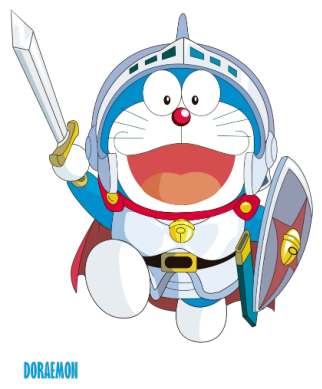

In [39]:
img_dir = current_dir + "/doraemon.jpg"
print(f"{img_dir=}")

img = plt.imread(img_dir)
print(f"Orginal shape {img.shape}")

# Make it smaller
resize_factor = 0.5
new_size = (int(img.shape[1] * resize_factor), int(img.shape[0] * resize_factor))
img = cv2.resize(img, new_size)
plt.imshow(img)
plt.axis("off")
img.shape

---
### Image Kernels

Image kernel or image filter is a matrix that can be applied to an image through a convolution operation, which works like a sliding dot-product. By convolving an image with a kernel, features are extracted from the image. There are several kernels that humans have designed to perform different filters on an image, e.g. blurring, edge, sharpen, ...

For example edge filter:

$K = \begin{pmatrix} 0 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 0 \end{pmatrix}$

We can convolve it with the image $A$:

$$
A * K = \begin{pmatrix} 0 & 1 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 1 & 0 & 0 \end{pmatrix} * \begin{pmatrix} 0 & -1 & 0 \\ -1 & 4 & -1 \\ 0 & -1 & 0 \end{pmatrix} = \begin{pmatrix} 2 & -1 \\ 2 & -1 \end{pmatrix}
$$

Here we used `stride (1,1)`, which means that the window is moved one step and calculates the dot product, then moves another 1 step to compute dot product again.

We note that the convolved image becomes smaller, so if we want to keep the same size as original image we need to pad it with zeros, yes we will lose information in the borders.



In [40]:
edge_filter = np.array([ [0, -1, 0]
                       , [-1,4,-1]
                       , [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

# adjust the values of the filter and see different effects
outline_filter = np.array([[-1, -1, -1],
                           [-1, 4, -1],
                           [-1, -1, -1]])

filters = [edge_filter, blur_filter, outline_filter]

filter_names = ["Edge", "Blur", "Outline"]

Already created folder


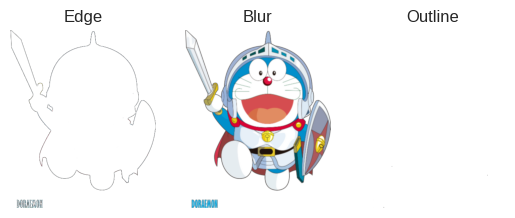

In [41]:
processed_images_path = f"{data_dir}/processed_images"
#create folder processed_images inside data folder

try:
    os.mkdir(processed_images_path)
except FileExistsError as err:
    print("Already created folder")

fig, axes = plt.subplots(1, len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
  filtered_img = cv2.filter2D(img, -1,kernel = filter)
  ax.imshow(filtered_img)
  ax.axis("off")
  ax.set(title=f"{filter_name}")

fig.savefig(f"{processed_images_path}/Filered_images.png")
